# Trading Strategies powered by Machine Learning - Regression

## Linear Regression with scikit-learn - a simple Introduction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

/var/folders/k8/xm42xp_16cs6fgtvp6ymr9l40000gn/T/ipykernel_39990/4095138375.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [2]:
budget = np.array([5, 10, 17, 27, 35, 40, 42, 49, 54, 60])

In [3]:
revenue = np.array([2.6, 19. , 23.8, 26.9, 41.1, 58.3, 40.3, 58.7, 73.1, 69.7])

In [5]:
df = pd.DataFrame(data = {"revenue":revenue, "budget":budget})
df

,revenue,budget
0,2.6,5
1,19.0,10
2,23.8,17
3,26.9,27
4,41.1,35
5,58.3,40
6,40.3,42
7,58.7,49
8,73.1,54
9,69.7,60


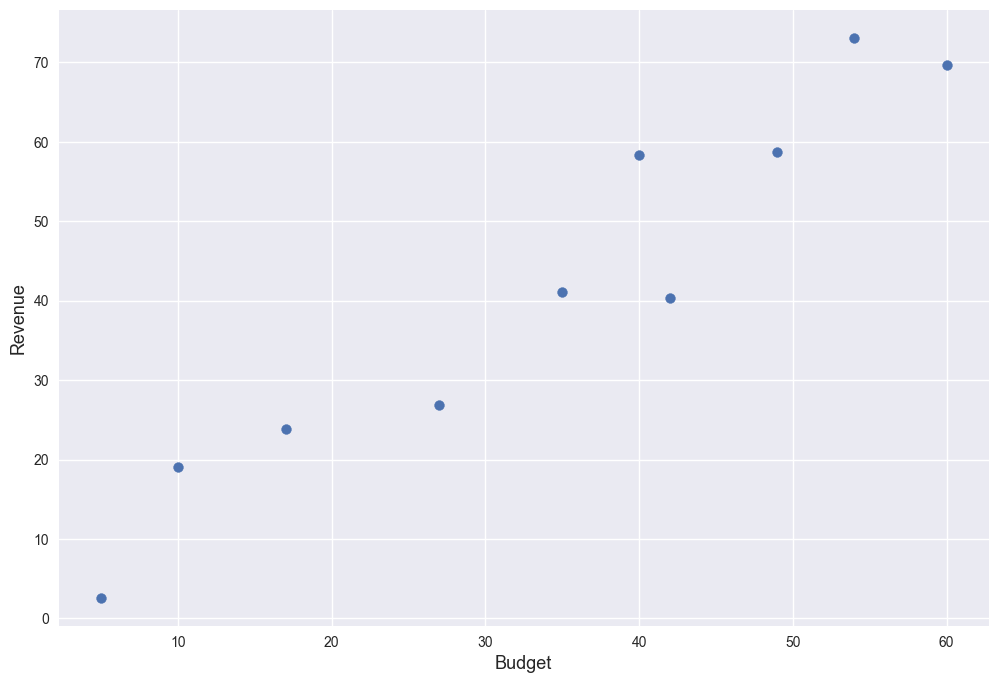

In [6]:
plt.figure( figsize = (12, 8))
plt.scatter(x = df.budget, y = df.revenue, s = 50)
plt.xlabel("Budget", fontsize = 13)
plt.ylabel("Revenue", fontsize = 13)
plt.show()

__Linear Relationship between Budget and Revenue__:

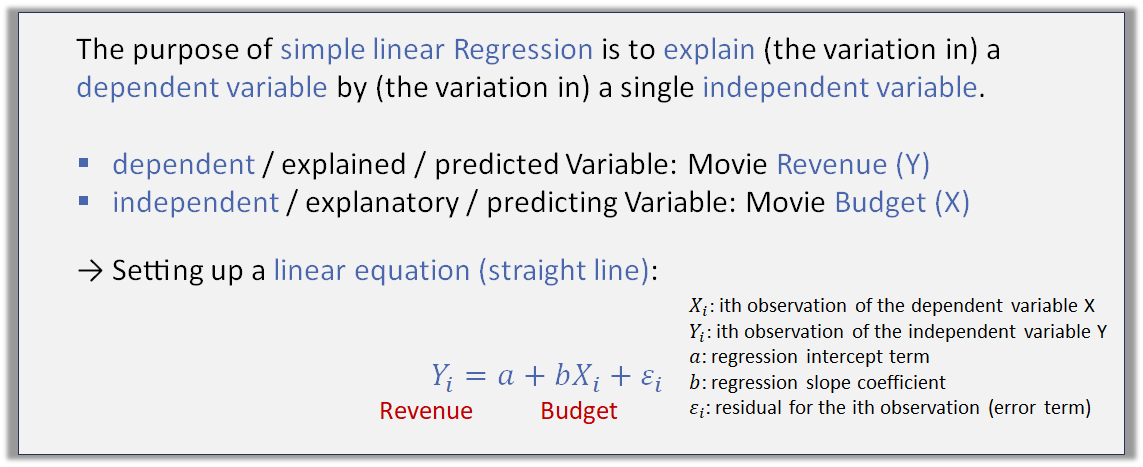

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
lm = LinearRegression(fit_intercept = True)

In [10]:
lm.fit(X = df.budget.to_frame(), y = df.revenue) # fitting the model (Regression Line)

LinearRegression()

In [11]:
slope = lm.coef_ # slope of Regression Line
slope

array([1.19897684])

In [12]:
intercept = lm.intercept_ # intercept of Regression Line
intercept

0.7046849757673712

In [13]:
df["pred"] = lm.predict(df.budget.to_frame())
df

,revenue,budget,pred
0,2.6,5,6.699569
1,19.0,10,12.694453
2,23.8,17,21.087291
3,26.9,27,33.077060
4,41.1,35,42.668875
5,58.3,40,48.663759
6,40.3,42,51.061712
7,58.7,49,59.454550
8,73.1,54,65.449435
9,69.7,60,72.643296


In [14]:
x_lin = np.array([0, 100])
y_lin = intercept + slope * x_lin

In [15]:
y_lin

array([  0.70468498, 120.60236941])

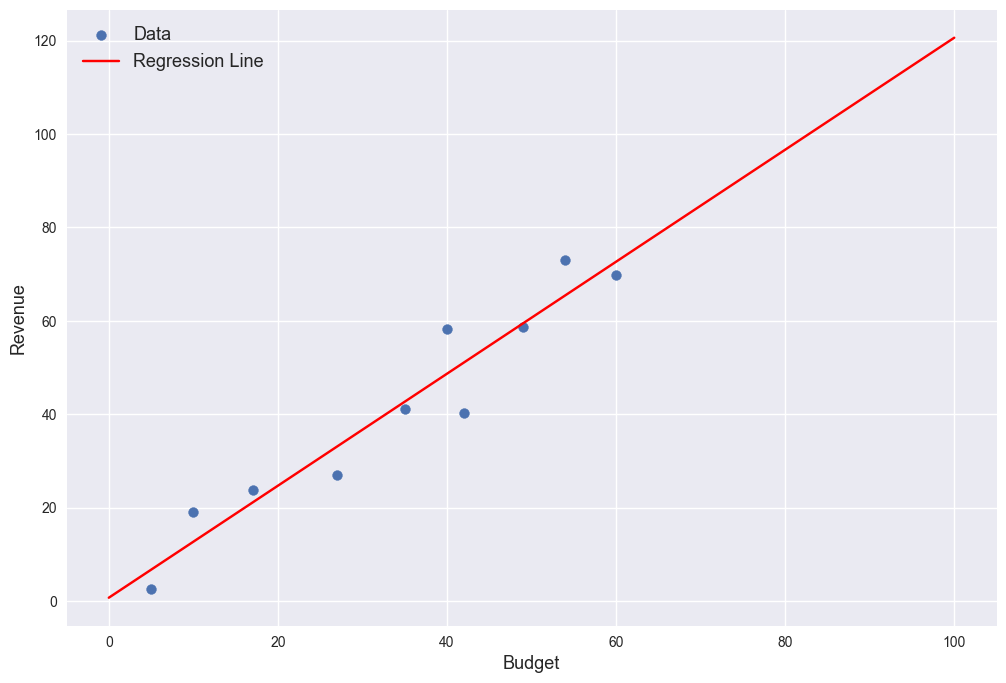

In [16]:
plt.figure( figsize = (12, 8))
plt.scatter(x = df.budget, y = df.revenue, s = 50, label = "Data")
plt.plot(x_lin, y_lin, c = "red", label = "Regression Line")
plt.xlabel("Budget", fontsize = 13)
plt.ylabel("Revenue", fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

## Making Predictions with Linear Regression

__new movies (observations/data points)__

In [17]:
budget_new = np.array([63, 66, 74, 80, 85]) 

In [18]:
revenue_new = np.array([74.2,  80.7, 98.2,  94.8, 101.7]) 

In [19]:
df_new = pd.DataFrame(data = {"revenue":revenue_new, "budget":budget_new})
df_new

,revenue,budget
0,74.2,63
1,80.7,66
2,98.2,74
3,94.8,80
4,101.7,85


In [20]:
df_new["pred"] = lm.predict(df_new.budget.to_frame())
df_new

,revenue,budget,pred
0,74.2,63,76.240226
1,80.7,66,79.837157
2,98.2,74,89.428971
3,94.8,80,96.622833
4,101.7,85,102.617717


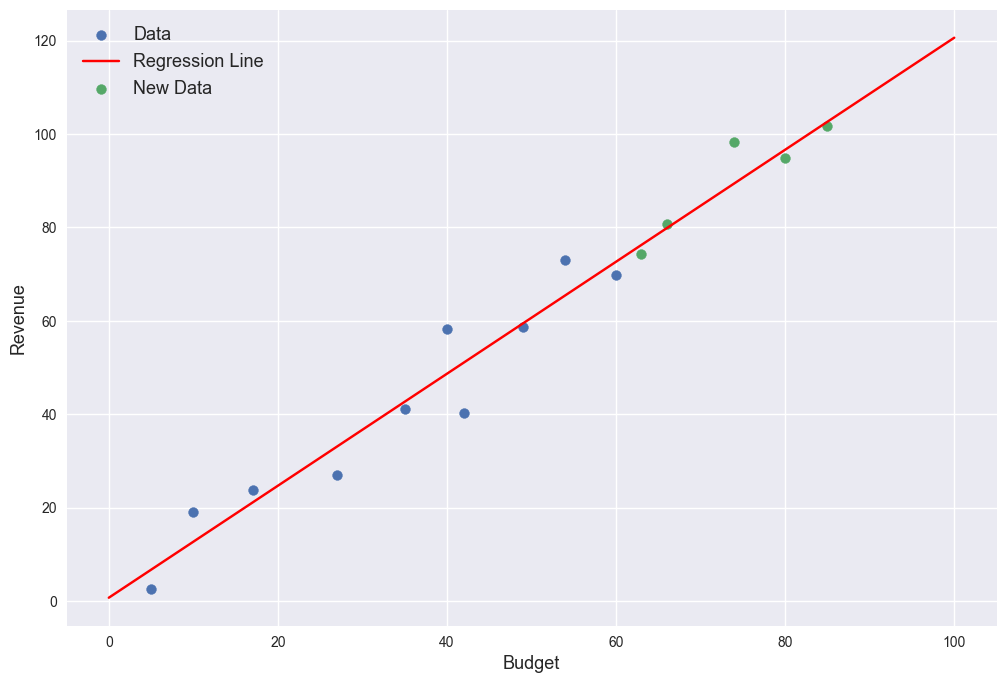

In [21]:
plt.figure( figsize = (12, 8))
plt.scatter(x = df.budget, y = df.revenue, s = 50, label = "Data")
plt.plot(x_lin, y_lin, c = "red", label = "Regression Line")
plt.scatter(x = df_new.budget, y = df_new.revenue, s = 50, label = "New Data")
plt.xlabel("Budget", fontsize = 13)
plt.ylabel("Revenue", fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

## Overfitting

__Overfitting__: Model performs well on the original (training) dataset, but it does not generalize well to new data (test set).
Overfitting happens when the __model is too complex__ (too many parameters) and detects subtle patterns (noise) in the training set. 

Example: __Polynomial Model__ with degree = 9 (perfect fit)

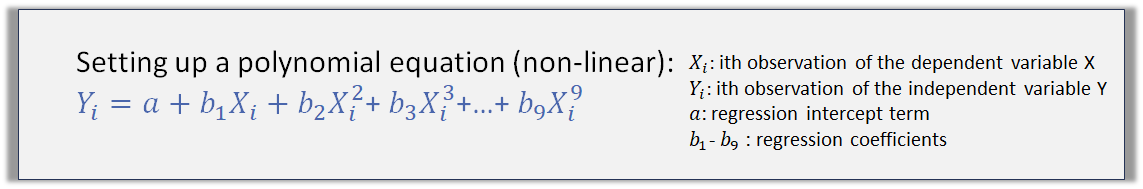

In [22]:
poly_m = np.polyfit(x = df.budget, y = df.revenue, deg = 9) # polynomial regression (deg = 9)

In [23]:
poly_m # 10 regression parameters (intercept + 9 regression coefficients)

array([ 2.31988762e-09, -6.91663857e-07,  8.80409588e-05, -6.24271102e-03,
        2.69731803e-01, -7.29512946e+00,  1.21996447e+02, -1.19724559e+03,
        6.13254339e+03, -1.21710591e+04])

In [24]:
x_poly = np.linspace(0, 100, 1000) # x values for polynomial regression line/curve

In [25]:
y_poly = np.polyval(poly_m, x_poly) # y values for polynomial regression line/curve

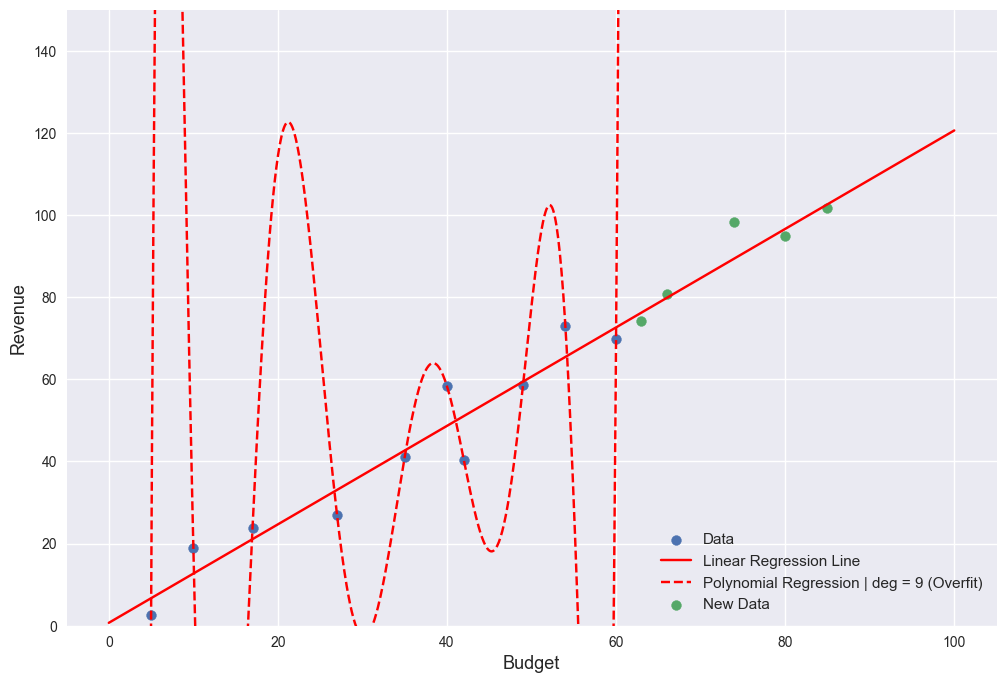

In [26]:
plt.figure( figsize = (12, 8))
plt.scatter(x = df.budget, y = df.revenue, s = 50, label = "Data")
plt.plot(x_lin, y_lin, c = "red", label = "Linear Regression Line")
plt.plot(x_poly, y_poly, label = "Polynomial Regression | deg = 9 (Overfit)",linestyle = "--", color = "red")
plt.scatter(x = df_new.budget, y = df_new.revenue, s = 50, label = "New Data")
plt.xlabel("Budget", fontsize = 13)
plt.ylabel("Revenue", fontsize = 13)
plt.legend(fontsize = 11, loc = 4)
plt.ylim(0, 150)
plt.show()
# 새로운 관측치는 overfitting 되어서 예측값과 실제값이 차이가 많이 난다.

__Solutions__ to overcome overfitting:

- use a __simpler model__ with fewer parameters (linear rather than polynomial)<br>
- more and better data (remove outliers & errors) <br>
- constrain the model -> make the model more simple with __Regularization__

##  Underfitting

__Underfitting__: Model performs neither well on the original (training) dataset, nor does it generalize well to new data (test set).
Underfitting happens when the __model is too simple__ to learn the underlying structure of the data.

most simple (linear) model with only one paramter: __y = a__ <br>
intercept == a (e.g. the mean)<br>
slope == 0 

In [27]:
mean = df.revenue.mean()
mean

41.35000000000001

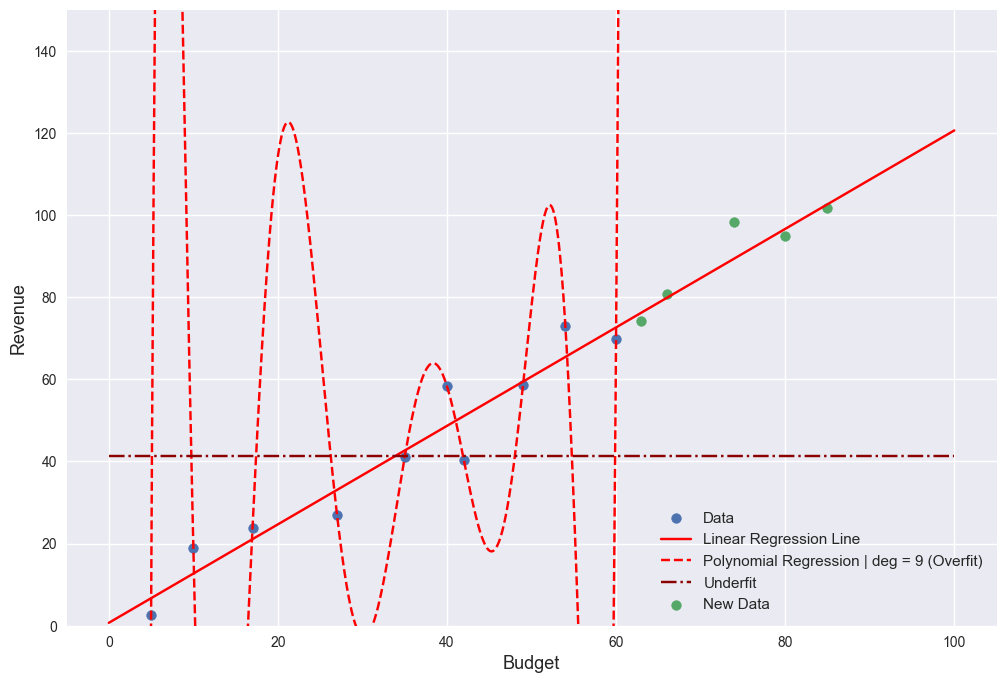

In [28]:
plt.figure( figsize = (12, 8))
plt.scatter(x = df.budget, y = df.revenue, s = 50, label = "Data")
plt.plot(x_lin, y_lin, c = "red", label = "Linear Regression Line")
plt.plot(x_poly, y_poly, label = "Polynomial Regression | deg = 9 (Overfit)",linestyle = "--", color = "red")
plt.hlines(y = mean, xmin = 0, xmax = 100, linestyle = "-.", color = "darkred", label = "Underfit")
plt.scatter(x = df_new.budget, y = df_new.revenue, s = 50, label = "New Data")
plt.xlabel("Budget", fontsize = 13)
plt.ylabel("Revenue", fontsize = 13)
plt.legend(fontsize = 11, loc = 4)
plt.ylim(0, 150)
plt.show()
# underfitting이 되었다. regularization을 줄여야 한다.

__Solutions__ to overcome underfitting:

- use a __more powerful model__ with more parameters<br>
- add more/better features (independent variables) to the algorithm -> Feature Engineering <br>
- reduce the constraints of the model -> make it more complex with __less Regularization__

## Getting the Data

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

/var/folders/k8/xm42xp_16cs6fgtvp6ymr9l40000gn/T/ipykernel_39990/4095138375.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [30]:
data = pd.read_csv("five_minute.csv", parse_dates = ["time"], index_col = "time")

In [31]:
data.head()

,price
time,
2019-01-01 22:00:00+00:00,1.14658
2019-01-01 22:05:00+00:00,1.14635
2019-01-01 22:10:00+00:00,1.14632
2019-01-01 22:15:00+00:00,1.14632
2019-01-01 22:20:00+00:00,1.14653


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 73720 entries, 2019-01-01 22:00:00+00:00 to 2019-12-30 23:55:00+00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   73720 non-null  float64
dtypes: float64(1)
memory usage: 1.1 MB


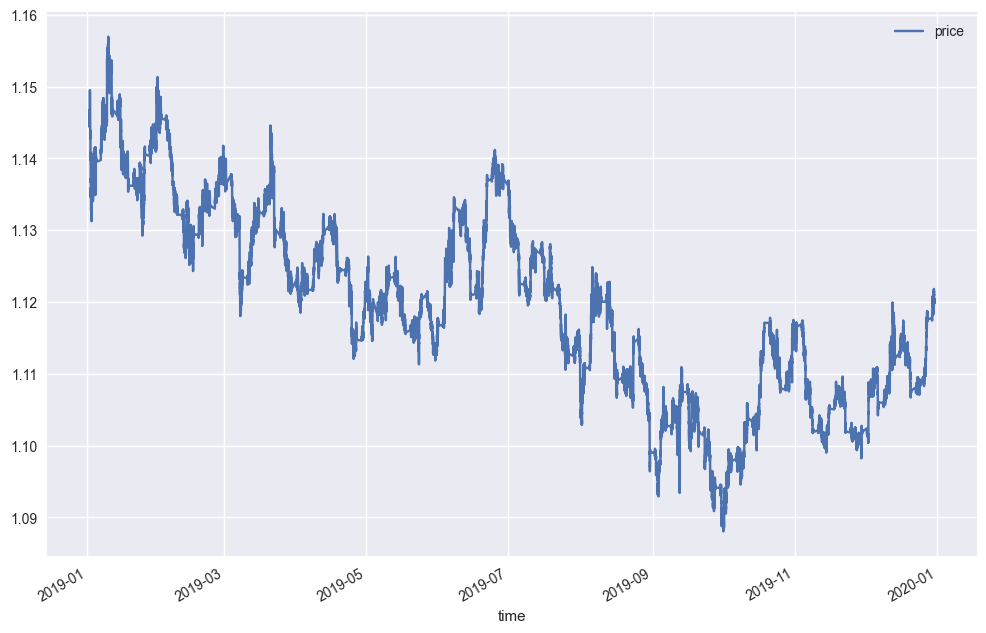

In [33]:
data.plot(figsize = (12, 8))
plt.show()

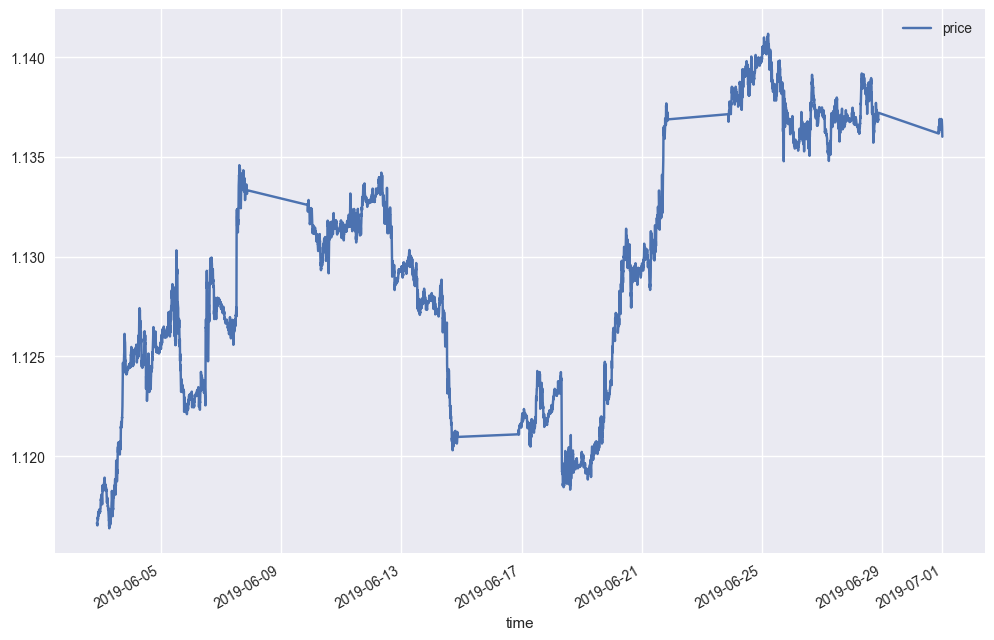

In [34]:
data.loc["2019-06"].plot(figsize = (12, 8))
plt.show()

In [35]:
data["returns"] = np.log(data.div(data.shift(1)))

In [36]:
data.head()

,price,returns
time,,
2019-01-01 22:00:00+00:00,1.14658,NaN
2019-01-01 22:05:00+00:00,1.14635,-0.000201
2019-01-01 22:10:00+00:00,1.14632,-0.000026
2019-01-01 22:15:00+00:00,1.14632,0.000000
2019-01-01 22:20:00+00:00,1.14653,0.000183


## A simple Linear Model to predict Financial Returns (Part 1)

Correct: Predicting __Returns__ <br>
Wrong: Predicting __Prices__

In [37]:
data.head()

,price,returns
time,,
2019-01-01 22:00:00+00:00,1.14658,NaN
2019-01-01 22:05:00+00:00,1.14635,-0.000201
2019-01-01 22:10:00+00:00,1.14632,-0.000026
2019-01-01 22:15:00+00:00,1.14632,0.000000
2019-01-01 22:20:00+00:00,1.14653,0.000183


In [38]:
data["lag1"] = data.returns.shift(1) # lag1 전날 수익률

In [39]:
data.dropna(inplace = True)

In [41]:
data.head()

,price,returns,lag1
time,,,
2019-01-01 22:10:00+00:00,1.146320,-0.000026,-0.000201
2019-01-01 22:15:00+00:00,1.146320,0.000000,-0.000026
2019-01-01 22:20:00+00:00,1.146530,0.000183,0.000000
2019-01-01 22:25:00+00:00,1.146475,-0.000048,0.000183
2019-01-01 22:30:00+00:00,1.146455,-0.000017,-0.000048


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 73718 entries, 2019-01-01 22:10:00+00:00 to 2019-12-30 23:55:00+00:00
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   price    73718 non-null  float64
 1   returns  73718 non-null  float64
 2   lag1     73718 non-null  float64
dtypes: float64(3)
memory usage: 2.2 MB


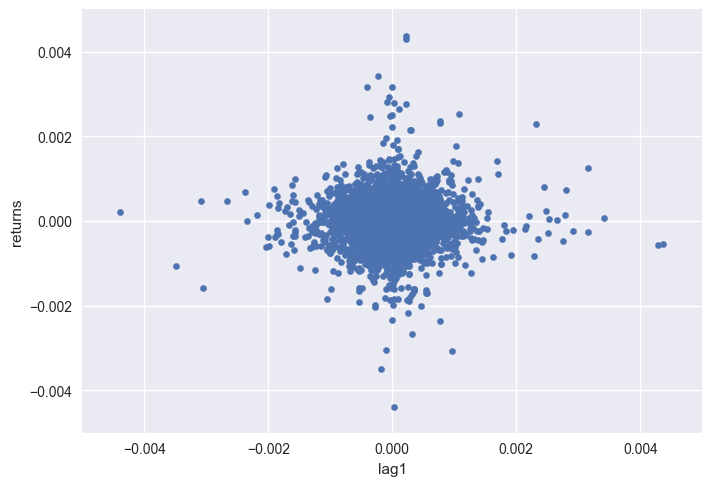

In [43]:
data.iloc[:, -2:].plot(kind = "scatter", x = "lag1", y = "returns")
plt.xlim(-0.005, 0.005)
plt.ylim(-0.005, 0.005)
plt.show() # return과 lag1 사이에 연관성이 거의 없다.

## A simple Linear Model to predict Financial Returns (Part 2)

In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
lm = LinearRegression(fit_intercept = True)

In [46]:
lm.fit(data.lag1.to_frame(), data.returns)

LinearRegression()

In [47]:
slope = lm.coef_
slope

array([-0.03350837])

In [48]:
intercept = lm.intercept_
intercept

-3.2442471445009387e-07

In [49]:
data["pred"] = lm.predict(data.lag1.to_frame())

In [50]:
data.head()

,price,returns,lag1,pred
time,,,,
2019-01-01 22:10:00+00:00,1.146320,-0.000026,-0.000201,6.397912e-06
2019-01-01 22:15:00+00:00,1.146320,0.000000,-0.000026,5.525013e-07
2019-01-01 22:20:00+00:00,1.146530,0.000183,0.000000,-3.244247e-07
2019-01-01 22:25:00+00:00,1.146475,-0.000048,0.000183,-6.462425e-06
2019-01-01 22:30:00+00:00,1.146455,-0.000017,-0.000048,1.283038e-06


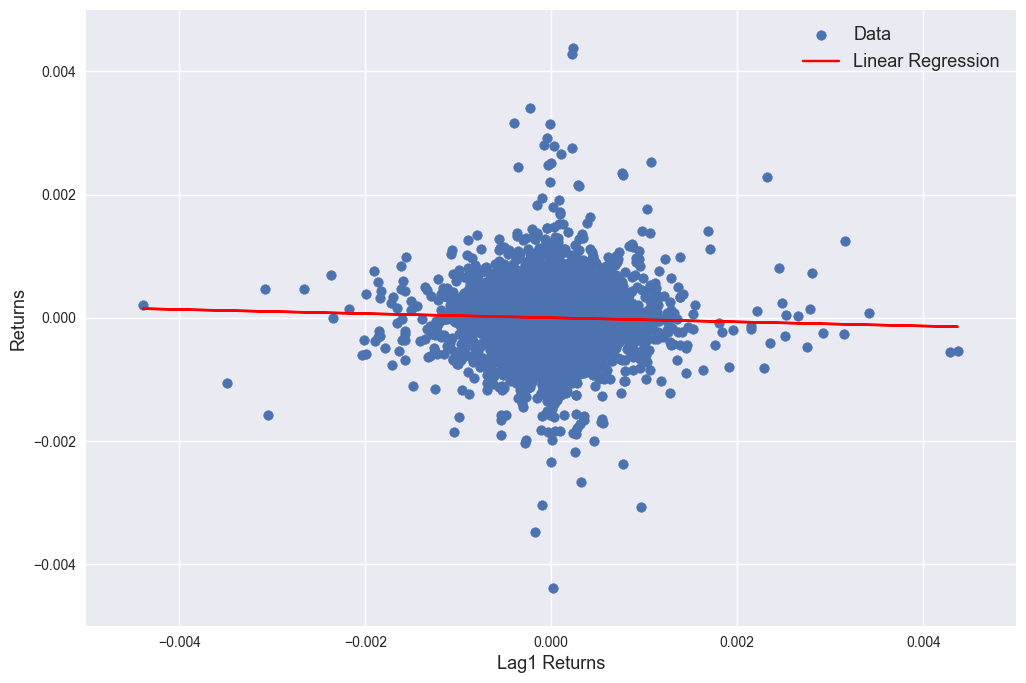

In [51]:
plt.figure(figsize = (12, 8))
plt.scatter(x = data.lag1, y = data.returns, label = "Data")
plt.plot(data.lag1, data.pred, c = "red", label = "Linear Regression")
plt.xlim(-0.005, 0.005)
plt.ylim(-0.005, 0.005)
plt.legend(fontsize = 13)
plt.xlabel("Lag1 Returns", fontsize = 13)
plt.ylabel("Returns", fontsize = 13)
plt.show()

In [52]:
data.head()

,price,returns,lag1,pred
time,,,,
2019-01-01 22:10:00+00:00,1.146320,-0.000026,-0.000201,6.397912e-06
2019-01-01 22:15:00+00:00,1.146320,0.000000,-0.000026,5.525013e-07
2019-01-01 22:20:00+00:00,1.146530,0.000183,0.000000,-3.244247e-07
2019-01-01 22:25:00+00:00,1.146475,-0.000048,0.000183,-6.462425e-06
2019-01-01 22:30:00+00:00,1.146455,-0.000017,-0.000048,1.283038e-06


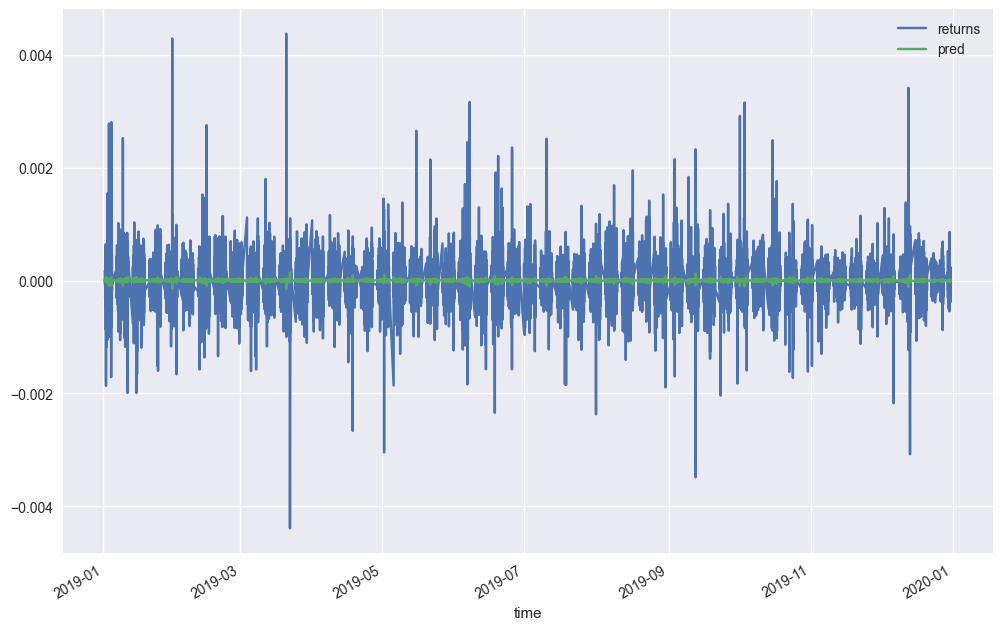

In [53]:
data[["returns", "pred"]].plot(figsize = (12, 8))
plt.show() # model fails to predict the magnitude of returns
# 수평에 가까운 기울기를 가지기에 preds는 수익률이 낮다.
# pred : 전날 종가를 바탕으로 당일 position을 결정한다. 전날 종가를 x 변수로 넣으면 당일 예상 수익률이 나온다.

In [54]:
data.pred = np.sign(data.pred) # maybe the model can predict the market direction (-1 / +1)
# 당일 예상 수익률 부호에 따라서 position을 결정한다.

In [55]:
data.head()

,price,returns,lag1,pred
time,,,,
2019-01-01 22:10:00+00:00,1.146320,-0.000026,-0.000201,1.0
2019-01-01 22:15:00+00:00,1.146320,0.000000,-0.000026,1.0
2019-01-01 22:20:00+00:00,1.146530,0.000183,0.000000,-1.0
2019-01-01 22:25:00+00:00,1.146475,-0.000048,0.000183,-1.0
2019-01-01 22:30:00+00:00,1.146455,-0.000017,-0.000048,1.0


In [56]:
np.sign(data.returns * data.pred)

time
2019-01-01 22:10:00+00:00   -1.0
2019-01-01 22:15:00+00:00    0.0
2019-01-01 22:20:00+00:00   -1.0
2019-01-01 22:25:00+00:00    1.0
2019-01-01 22:30:00+00:00   -1.0
                            ... 
2019-12-30 23:35:00+00:00   -1.0
2019-12-30 23:40:00+00:00   -1.0
2019-12-30 23:45:00+00:00   -1.0
2019-12-30 23:50:00+00:00    1.0
2019-12-30 23:55:00+00:00   -1.0
Length: 73718, dtype: float64

In [57]:
hits = np.sign(data.returns * data.pred).value_counts()

In [59]:
hits # +1 : 방향이 맞았을 경우, -1 : 방향이 틀렸을 경우

 1.0    37451
-1.0    34308
 0.0     1959
dtype: int64

In [60]:
hit_ratio = hits[1.0] / sum(hits)
hit_ratio # percentage of correctly forecasted market directions
# 적중률 50.8%

0.5080306031091457

## A Multiple Regression Model to predict Financial Returns

__Adding more Features - a multiple Regression Model__

In [69]:
data = pd.read_csv("five_minute.csv", parse_dates = ["time"], index_col = "time")

In [70]:
data.head()

,price
time,
2019-01-01 22:00:00+00:00,1.14658
2019-01-01 22:05:00+00:00,1.14635
2019-01-01 22:10:00+00:00,1.14632
2019-01-01 22:15:00+00:00,1.14632
2019-01-01 22:20:00+00:00,1.14653


In [71]:
data.dropna(inplace = True)

In [72]:
data["returns"] = np.log(data.div(data.shift(1)))

In [73]:
lags = 5

In [74]:
cols = []
for lag in range(1, lags + 1):
    col = "lag{}".format(lag)
    data[col] = data.returns.shift(lag)
    cols.append(col)
data.dropna(inplace = True)

In [77]:
data.head() # lag1~lag5을 계산한다.

,price,returns,lag1,lag2,lag3,lag4,lag5
time,,,,,,,
2019-01-01 22:30:00+00:00,1.146455,-0.000017,-0.000048,0.000183,0.000000,-0.000026,-0.000201
2019-01-01 22:35:00+00:00,1.146455,0.000000,-0.000017,-0.000048,0.000183,0.000000,-0.000026
2019-01-01 22:40:00+00:00,1.146370,-0.000074,0.000000,-0.000017,-0.000048,0.000183,0.000000
2019-01-01 22:45:00+00:00,1.146315,-0.000048,-0.000074,0.000000,-0.000017,-0.000048,0.000183
2019-01-01 22:50:00+00:00,1.146475,0.000140,-0.000048,-0.000074,0.000000,-0.000017,-0.000048


In [79]:
cols

['lag1', 'lag2', 'lag3', 'lag4', 'lag5']

In [ ]:
lm = LinearRegression(fit_intercept = True)

In [80]:
lm.fit(data[cols], data.returns) # 다중선형회귀 5개의 independent features

LinearRegression()

In [86]:
lm.coef_

array([-0.03358358, -0.00243139,  0.00365238, -0.00366896, -0.00360391])

In [87]:
lm.intercept_

-3.278292441995064e-07

In [88]:
data["pred"] = lm.predict(data[cols].values)

/Users/minkyuramen/Desktop/kubig_financial/venv/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [89]:
data.head()

,price,returns,lag1,lag2,lag3,lag4,lag5,pred
time,,,,,,,,
2019-01-01 22:30:00+00:00,1.146455,-0.000017,-0.000048,0.000183,0.000000,-0.000026,-0.000201,0.000002
2019-01-01 22:35:00+00:00,1.146455,0.000000,-0.000017,-0.000048,0.000183,0.000000,-0.000026,0.000001
2019-01-01 22:40:00+00:00,1.146370,-0.000074,0.000000,-0.000017,-0.000048,0.000183,0.000000,-0.000001
2019-01-01 22:45:00+00:00,1.146315,-0.000048,-0.000074,0.000000,-0.000017,-0.000048,0.000183,0.000002
2019-01-01 22:50:00+00:00,1.146475,0.000140,-0.000048,-0.000074,0.000000,-0.000017,-0.000048,0.000002


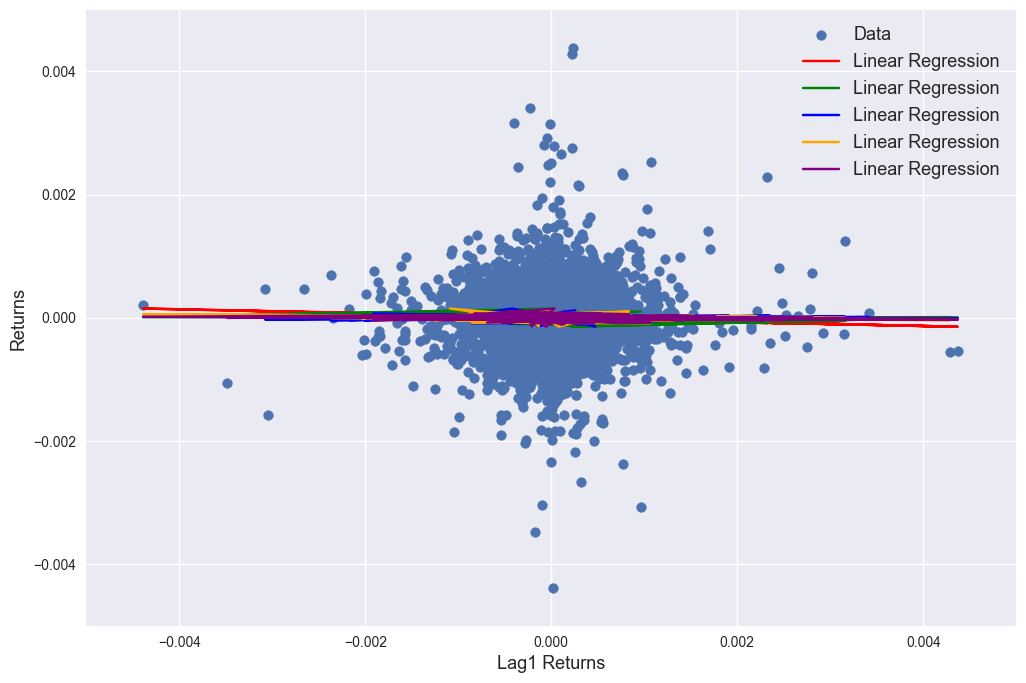

In [93]:
plt.figure(figsize = (12, 8))
plt.scatter(x = data.lag1, y = data.returns, label = "Data")
plt.plot(data.lag1, data.pred, c = "red", label = "Linear Regression")
plt.plot(data.lag2, data.pred, c = "green", label = "Linear Regression")
plt.plot(data.lag3, data.pred, c = "blue", label = "Linear Regression")
plt.plot(data.lag4, data.pred, c = "orange", label = "Linear Regression")
plt.plot(data.lag5, data.pred, c = "purple", label = "Linear Regression")

plt.xlim(-0.005, 0.005)
plt.ylim(-0.005, 0.005)
plt.legend(fontsize = 13)
plt.xlabel("Lag1 Returns", fontsize = 13)
plt.ylabel("Returns", fontsize = 13)
plt.show()

In [94]:
data.pred = np.sign(data.pred) # 방향을 결정

In [95]:
data.head()

,price,returns,lag1,lag2,lag3,lag4,lag5,pred
time,,,,,,,,
2019-01-01 22:30:00+00:00,1.146455,-0.000017,-0.000048,0.000183,0.000000,-0.000026,-0.000201,1.0
2019-01-01 22:35:00+00:00,1.146455,0.000000,-0.000017,-0.000048,0.000183,0.000000,-0.000026,1.0
2019-01-01 22:40:00+00:00,1.146370,-0.000074,0.000000,-0.000017,-0.000048,0.000183,0.000000,-1.0
2019-01-01 22:45:00+00:00,1.146315,-0.000048,-0.000074,0.000000,-0.000017,-0.000048,0.000183,1.0
2019-01-01 22:50:00+00:00,1.146475,0.000140,-0.000048,-0.000074,0.000000,-0.000017,-0.000048,1.0


In [96]:
data.pred.value_counts()

-1.0    39610
 1.0    34104
Name: pred, dtype: int64

In [97]:
hits = np.sign(data.returns * data.pred).value_counts()

In [98]:
hits

 1.0    37493
-1.0    34263
 0.0     1958
dtype: int64

In [99]:
hit_ratio = hits[1.0] / sum(hits)
hit_ratio # 50.78%로 소폭 상승

0.5086279404183737

## In-Sample Backtesting and the Look-ahead-bias

In [100]:
data.head()

,price,returns,lag1,lag2,lag3,lag4,lag5,pred
time,,,,,,,,
2019-01-01 22:30:00+00:00,1.146455,-0.000017,-0.000048,0.000183,0.000000,-0.000026,-0.000201,1.0
2019-01-01 22:35:00+00:00,1.146455,0.000000,-0.000017,-0.000048,0.000183,0.000000,-0.000026,1.0
2019-01-01 22:40:00+00:00,1.146370,-0.000074,0.000000,-0.000017,-0.000048,0.000183,0.000000,-1.0
2019-01-01 22:45:00+00:00,1.146315,-0.000048,-0.000074,0.000000,-0.000017,-0.000048,0.000183,1.0
2019-01-01 22:50:00+00:00,1.146475,0.000140,-0.000048,-0.000074,0.000000,-0.000017,-0.000048,1.0


In [101]:
data["strategy"] = data.pred * data.returns

In [102]:
data["creturns"] = data["returns"].cumsum().apply(np.exp)
data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)

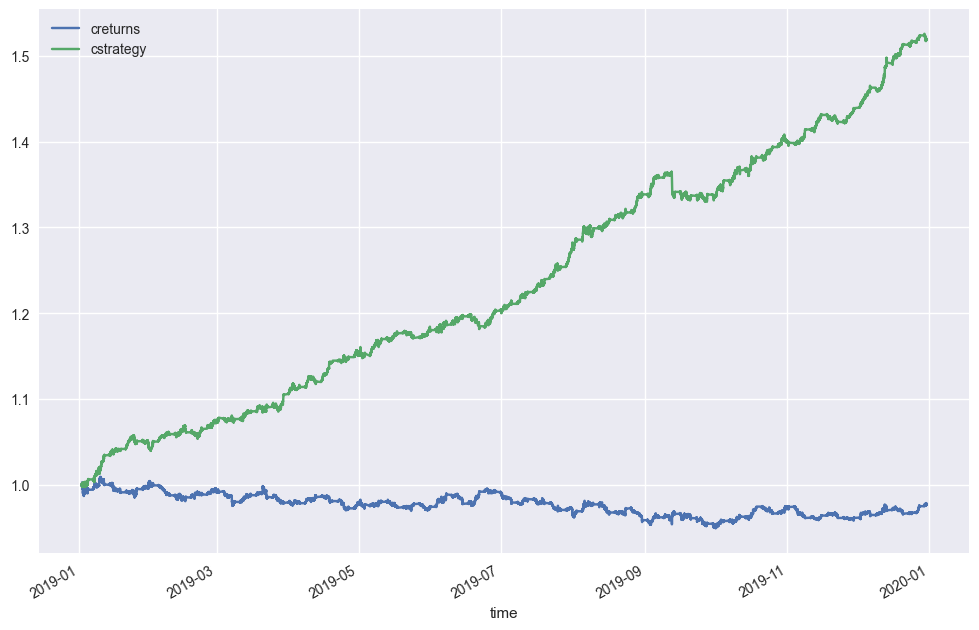

In [103]:
data[["creturns", "cstrategy"]].plot(figsize = (12 , 8))
plt.show() #in-sample backtesting

In [106]:
data["trades"] = data.pred.diff().fillna(0).abs()

In [107]:
data.trades.value_counts() # 매우 빈번한 position 변경

0.0    37100
2.0    36614
Name: trades, dtype: int64

## Out-Sample Forward Testing

In [110]:
data = pd.read_csv("test_set.csv", parse_dates = ["time"], index_col = "time")

In [111]:
data.head() # test set

,price
time,
2020-01-01 22:00:00+00:00,1.121325
2020-01-01 22:05:00+00:00,1.121250
2020-01-01 22:10:00+00:00,1.121250
2020-01-01 22:15:00+00:00,1.121460
2020-01-01 22:20:00+00:00,1.121540


In [112]:
data["returns"] = np.log(data.div(data.shift(1)))

In [113]:
data.head()

,price,returns
time,,
2020-01-01 22:00:00+00:00,1.121325,NaN
2020-01-01 22:05:00+00:00,1.121250,-0.000067
2020-01-01 22:10:00+00:00,1.121250,0.000000
2020-01-01 22:15:00+00:00,1.121460,0.000187
2020-01-01 22:20:00+00:00,1.121540,0.000071


In [114]:
lags = 5

In [115]:
cols = []
for lag in range(1, lags + 1):
    col = "lag{}".format(lag)
    data[col] = data.returns.shift(lag)
    cols.append(col)
data.dropna(inplace = True)

In [116]:
data.head()

,price,returns,lag1,lag2,lag3,lag4,lag5
time,,,,,,,
2020-01-01 22:40:00+00:00,1.121520,0.000004,-0.000022,0.000071,0.000187,0.000000,-0.000067
2020-01-01 22:45:00+00:00,1.121555,0.000031,0.000004,-0.000022,0.000071,0.000187,0.000000
2020-01-01 22:50:00+00:00,1.121550,-0.000004,0.000031,0.000004,-0.000022,0.000071,0.000187
2020-01-01 22:55:00+00:00,1.121515,-0.000031,-0.000004,0.000031,0.000004,-0.000022,0.000071
2020-01-01 23:00:00+00:00,1.121915,0.000357,-0.000031,-0.000004,0.000031,0.000004,-0.000022


In [117]:
data["pred"] = lm.predict(data[cols].values)

/Users/minkyuramen/Desktop/kubig_financial/venv/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [118]:
data.head()

,price,returns,lag1,lag2,lag3,lag4,lag5,pred
time,,,,,,,,
2020-01-01 22:40:00+00:00,1.121520,0.000004,-0.000022,0.000071,0.000187,0.000000,-0.000067,1.172394e-06
2020-01-01 22:45:00+00:00,1.121555,0.000031,0.000004,-0.000022,0.000071,0.000187,0.000000,-8.499182e-07
2020-01-01 22:50:00+00:00,1.121550,-0.000004,0.000031,0.000004,-0.000022,0.000071,0.000187,-2.404767e-06
2020-01-01 22:55:00+00:00,1.121515,-0.000031,-0.000004,0.000031,0.000004,-0.000022,0.000071,-4.129965e-07
2020-01-01 23:00:00+00:00,1.121915,0.000357,-0.000031,-0.000004,0.000031,0.000004,-0.000022,9.090211e-07


In [119]:
data.pred = np.sign(data.pred)

In [120]:
data.pred.value_counts()

-1.0    26143
 1.0    23218
Name: pred, dtype: int64

In [121]:
hits = np.sign(data.returns * data.pred).value_counts()

In [122]:
hits

 1.0    24995
-1.0    23754
 0.0      612
dtype: int64

In [123]:
hit_ratio = hits[1.0] / sum(hits)
hit_ratio # back test보다 약간 더 낮다.

0.5063714268349506

In [124]:
data["strategy"] = data.pred * data.returns

In [125]:
data["creturns"] = data["returns"].cumsum().apply(np.exp)
data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)

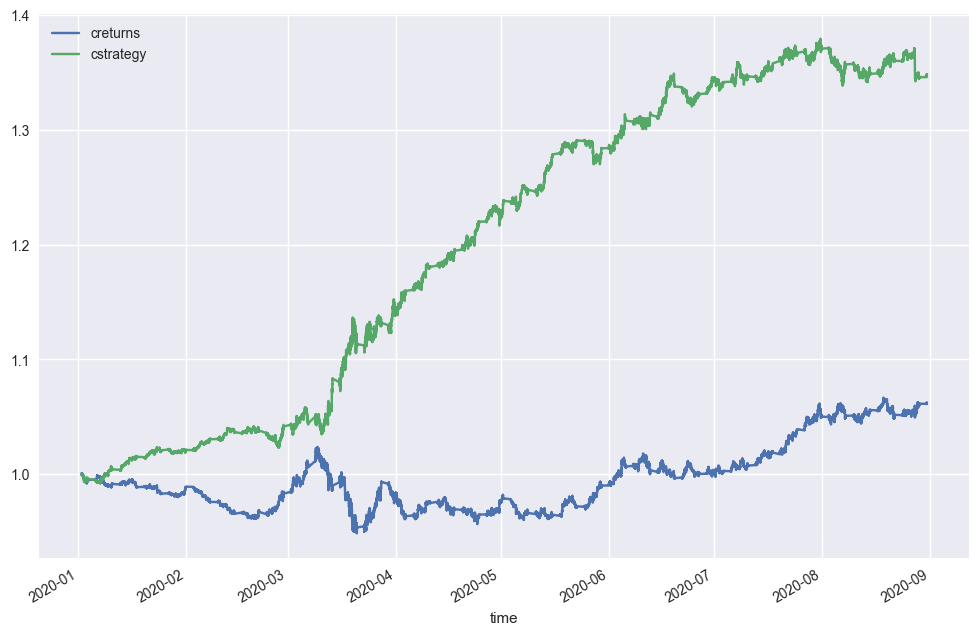

In [126]:
data[["creturns", "cstrategy"]].plot(figsize = (12 , 8))
plt.show()

In [127]:
data["trades"] = data.pred.diff().fillna(0).abs()

In [128]:
data.trades.value_counts() # 마찬가지로 position switch가 빈번하게 발생하였다.

0.0    25190
2.0    24171
Name: trades, dtype: int64